Firstly I am reading the bed file and creating a df out of it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(
    "../data/query.bed",      
    sep="\t",
    header=None,
    usecols=[0,1,2],
    names=["chrom","start","end"]
)
df["length"] = df["end"] - df["start"]






Although I could use inbuilt functions, but i chose to do it manually to understand the process better.

Here I am counting the number of fragments of each length

In [2]:
lc = {} # length count dictionary
for L in df["length"]:
    if L in lc:
        lc[L] += 1
    else:
        lc[L] = 1

#Dataframe is made

ldf = pd.DataFrame({
    "length": list(lc.keys()),
    "count":  list(lc.values())
})


ldf = ldf.sort_values("length").reset_index(drop=True)

# Now Normalizing is done.
total = ldf["count"].sum()
ldf["freq"] = ldf["count"] / total


Then simply plotting the graph

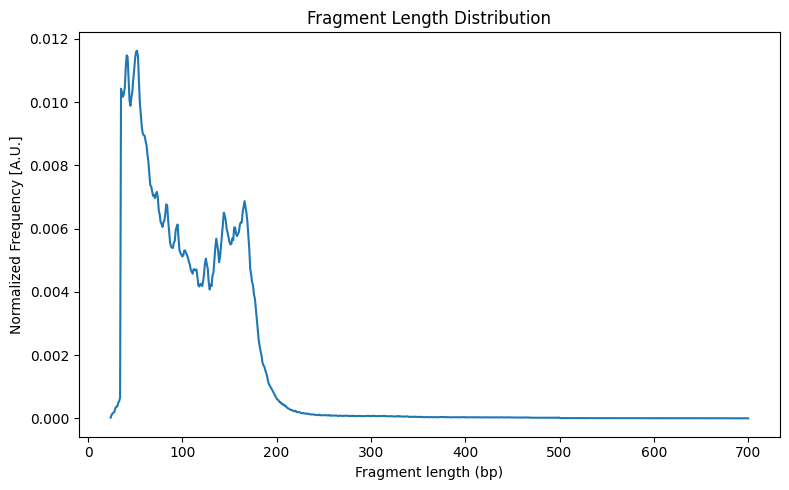

,length,count,freq
0,24,366,0.000026
1,25,1600,0.000116
2,26,2153,0.000156
3,27,2552,0.000184
4,28,2944,0.000213


In [3]:
plt.figure(figsize=(8,5))
plt.plot(
    ldf["length"],
    ldf["freq"],
    linestyle='-'
)
plt.xlabel("Fragment length (bp)")
plt.ylabel("Normalized Frequency [A.U.]")
plt.title("Fragment Length Distribution")
plt.tight_layout()
plt.show()

ldf.head()